In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('citi_bike_trip_data.csv')

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [4]:
df.shape

(40575, 15)

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,40.735229,-73.991093,450.073370,40.734885,-73.991212,17634.191547,1.137671
std,984.000376,362.462577,0.019599,0.012346,369.780126,0.019600,0.012483,1703.451047,0.527477
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14531.000000,0.000000
25%,408.000000,306.000000,40.721816,-74.000264,305.000000,40.721816,-74.001497,16146.000000,1.000000
50%,638.000000,405.000000,40.737050,-73.990765,404.000000,40.736529,-73.990931,17651.000000,1.000000
75%,1028.000000,487.000000,40.750450,-73.982050,487.000000,40.750224,-73.982050,19093.000000,1.000000
max,56629.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,2.000000


<Axes: xlabel='tripduration', ylabel='Count'>

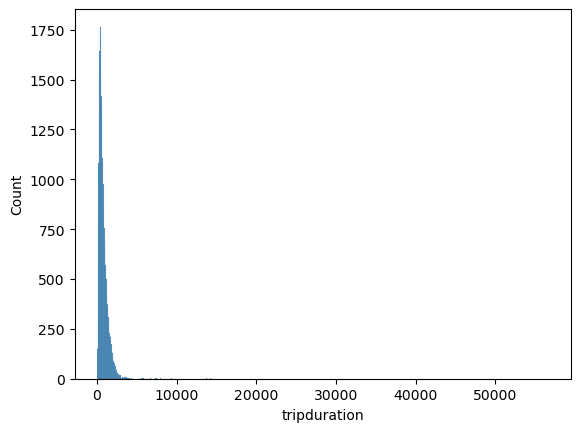

In [7]:
sns.histplot(df['tripduration'])

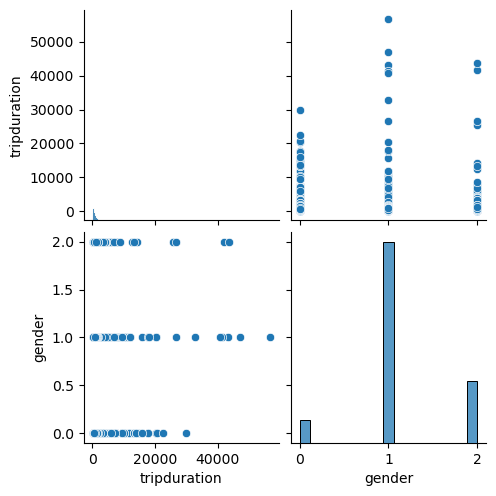

In [8]:
sns.pairplot(df[['tripduration','gender']])

In [9]:
num_subscriber = df['usertype'].loc[df['usertype'] == 'Subscriber'].count()
total = len(df)
print(round(num_subscriber/total*100,2), '% of total riders on OCtober 1st, 2013 is annual subscribers')

92.03 % of total riders on OCtober 1st, 2013 is annual subscribers


# Q1: How does trip length vary based on trip start time?

In [11]:
df['hour'] = df.starttime.apply(lambda x:x[11:13]).astype('str')

<Axes: xlabel='hour', ylabel='tripduration'>

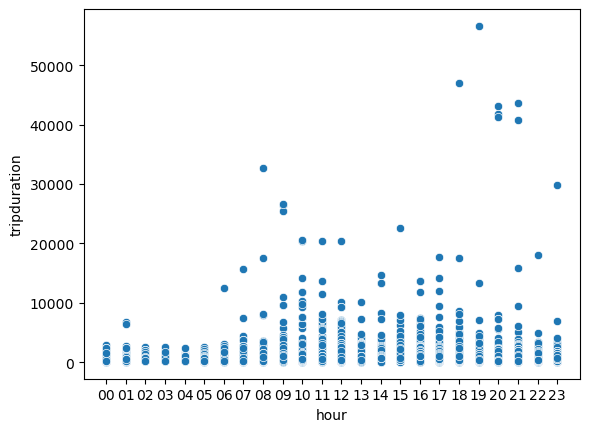

In [12]:
sns.scatterplot(x = 'hour', y = 'tripduration', data= df)

<Axes: xlabel='hour', ylabel='tripduration'>

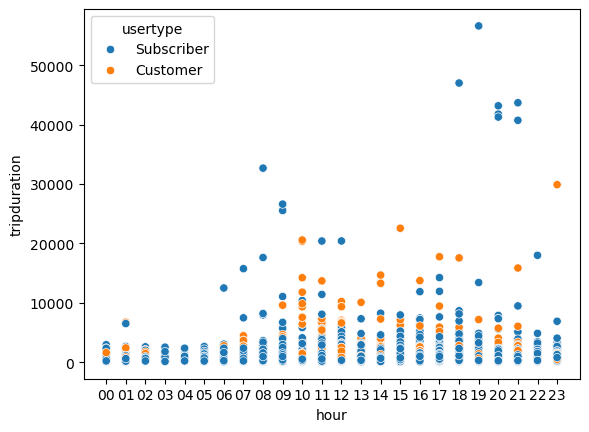

In [13]:
sns.scatterplot(x = 'hour', y = 'tripduration', data= df, hue= 'usertype')

# Q2: Which bike stations are most populr to start trips from?

In [15]:
df2 = df.groupby(['start station id']).size().reset_index(name = 'counts')

In [16]:
temp = df.drop_duplicates('start station id')
#left join
df2 = pd.merge(df2,temp[['start station id', 'start station name', 'start station latitude', 'start station longitude']], how = 'left', on = ['start station id'])

In [17]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [18]:
import folium

In [41]:
#initialize a map
m = folium.Map(location = [40.691966, -73.981302], tiles = 'OpenStreetMap', zoom_start = 12)

In [43]:
m

In [45]:
for i in range(0, len(df2)):
    folium.Circle(
        location = [df2.iloc[i]['start station latitude'], df.iloc[i]['start station longitude']],
        popup = df2.iloc[i]['start station name'],
        radius = float(df2.iloc[i]['counts'])/2,
        color = 'red',
        fill = True, fill_color = 'red',
    ).add_to(m)
                       

In [47]:
m